Process Data

In [1]:
train_link = "/mnt/hdd1tb/traffic-signs-data/train.p"
valid_link = "/mnt/hdd1tb/traffic-signs-data/valid.p"
test_link = "/mnt/hdd1tb/traffic-signs-data/test.p"

In [2]:
import pickle 

with open(train_link, mode='rb') as f:
    train_data = pickle.load(f)
with open(valid_link, mode='rb') as f:
    valid_data = pickle.load(f)
with open(test_link, mode='rb') as f:
    test_data = pickle.load(f)
    

In [5]:
train_data, train_data.items()

({'coords': array([[  6,   5,  21,  20],
         [  6,   6,  22,  22],
         [  5,   6,  22,  23],
         ...,
         [ 17,  15, 178, 155],
         [ 17,  15, 183, 160],
         [ 20,  18, 211, 184]], dtype=uint8),
  'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
  'features': array([[[[ 28,  25,  24],
           [ 27,  24,  23],
           [ 27,  24,  22],
           ...,
           [ 32,  28,  24],
           [ 31,  27,  25],
           [ 31,  27,  26]],
  
          [[ 29,  26,  25],
           [ 27,  25,  23],
           [ 27,  25,  23],
           ...,
           [ 32,  28,  24],
           [ 31,  27,  24],
           [ 30,  27,  25]],
  
          [[ 28,  26,  26],
           [ 27,  25,  23],
           [ 26,  25,  23],
           ...,
           [ 32,  28,  24],
           [ 31,  27,  24],
           [ 30,  27,  25]],
  
          ...,
  
          [[ 27,  24,  23],
           [ 28,  25,  24],
           [ 30,  25,  24],
           ...,
           [ 27,  

In [7]:
train_data['coords'], train_data['coords'].shape

(array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 (34799, 4))

In [10]:
train_data['labels'].shape

(34799,)

In [15]:
# sizes la chieu dai, rong cua anh
train_data['sizes'], train_data['sizes'].shape

(array([[ 26,  25],
        [ 27,  27],
        [ 27,  28],
        ...,
        [194, 169],
        [201, 175],
        [230, 201]], dtype=uint8),
 (34799, 2))

In [8]:
valid_data['coords'], valid_data['coords'].shape

(array([[  6,   5,  22,  20],
        [  6,   5,  22,  20],
        [  6,   5,  23,  21],
        ...,
        [ 10,   8,  99,  90],
        [ 10,  11, 112, 108],
        [ 13,  12, 138, 125]], dtype=uint8),
 (4410, 4))

In [9]:
# coords la toa do bounding box [x1,y1,x2,y2] cua cac anh
test_data['coords'], test_data['coords'].shape

(array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8),
 (12630, 4))

In [14]:
trainX = train_data['features']
labels = train_data['labels']
trainX.shape

(34799, 32, 32, 3)

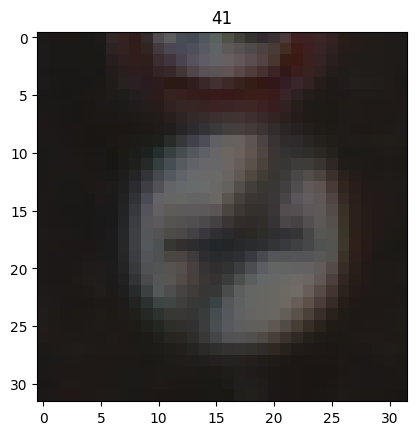

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.title(labels[0])
plt.imshow(trainX[0])
